In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn  as sns

In [2]:
df =pd.read_csv('ushape.csv')

In [3]:
df.head(2)

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0


In [4]:
df.sample(4)

,X,Y,class
96,0.2190,-0.653,1.0
82,1.2900,-0.207,1.0
0,0.0316,0.987,0.0
85,0.0249,0.107,1.0


In [30]:
X=df.iloc[:,[0,1]]
y=df['class']

<Axes: xlabel='X', ylabel='Y'>

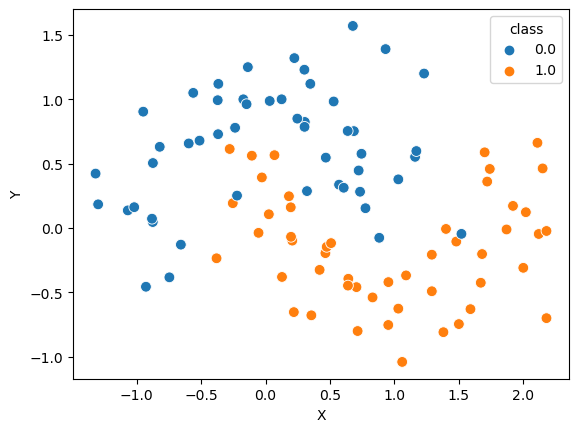

In [28]:
import seaborn as sns 
import matplotlib.pyplot as plt  
sns.scatterplot(df,x='X',y='Y',hue='class',s=60)

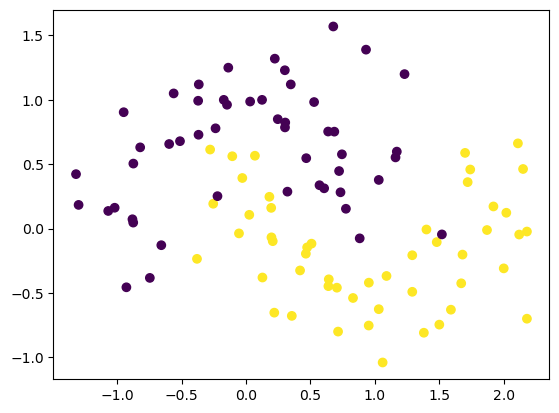

In [21]:
plt.scatter(X1['X'],X1['Y'],c=y)

In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [31]:
clf.fit(X,y)

LogisticRegression()

C:\Users\raj\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

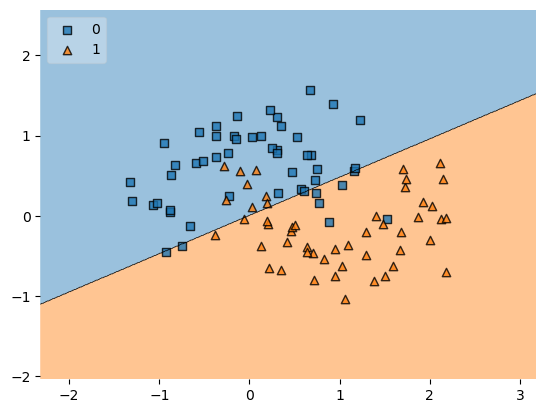

In [43]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y.astype('int'), clf, legend=2)

In [36]:
X=df.iloc[:,0:2]

In [39]:
X=np.array(X)

In [41]:
type(X)

numpy.ndarray

In [42]:
y=np.array(y)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression
Lor = LogisticRegression()
Lor.fit(X_train,y_train)

LogisticRegression()

In [49]:
y_pred= Lor.predict(X_test)

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6

<Axes: >

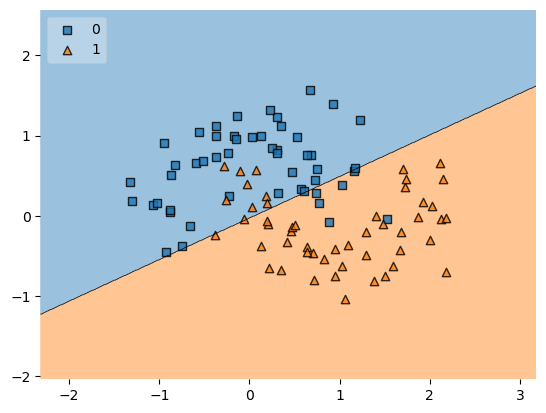

In [51]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y.astype('int'), Lor, legend=2)

In [54]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(Lor,X,y,scoring='accuracy',cv=10))

0.8300000000000001

In [55]:
from sklearn.preprocessing import PolynomialFeatures  
pol =PolynomialFeatures(degree=3,include_bias=False)

In [57]:
X_train_trf=pol.fit_transform(X_train)
X_test_trf=pol.transform(X_test)

In [58]:
Lor.fit(X_train_trf,y_train)

LogisticRegression()

In [63]:
y_pre = Lor.predict(X_test_trf)
X_trf = pol.fit_transform(X)

In [64]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

0.9

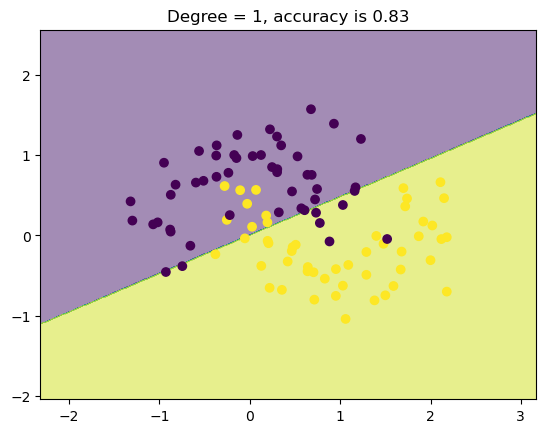

In [65]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))
plot_decision_boundary(X,y)

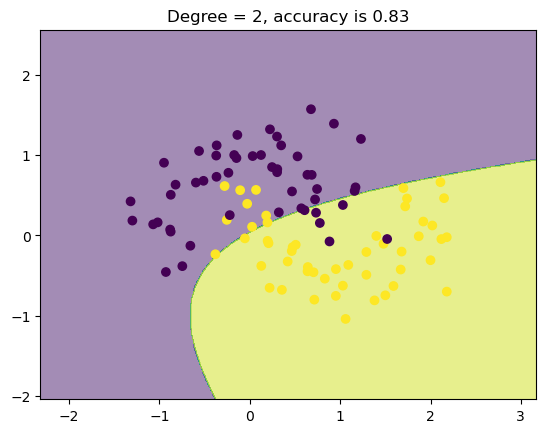

In [66]:
plot_decision_boundary(X,y,degree=2)

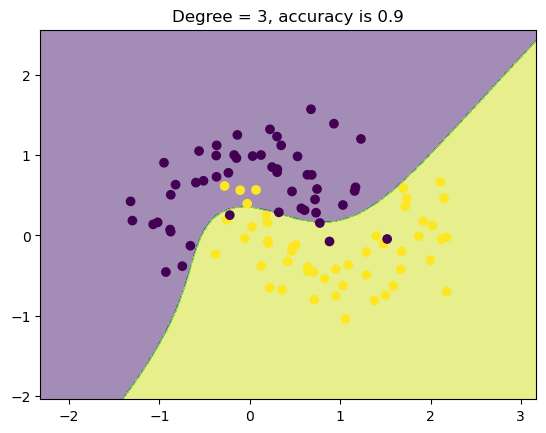

In [67]:
plot_decision_boundary(X,y,degree=3)

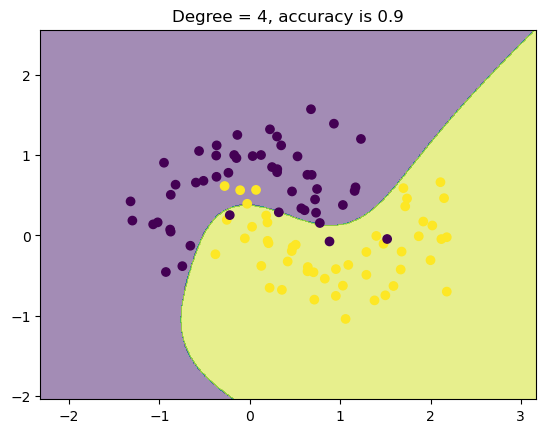

In [68]:
plot_decision_boundary(X,y,degree=4)